In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from nodestudio.core.metadata import *
from nodestudio.process.phantom.phantom import *
from nodestudio.process.core.fft import *
from nodestudio.process.core.undersampling import *
from nodestudio.process.recon.GRAPPA import * 

230122-16:36:25,884 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.7.1


In [3]:
datagroup = phantom_generator("Shepp_logan", 256, 6)

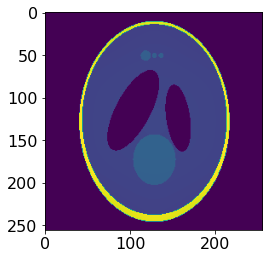

In [4]:
plt.imshow(np.sum(np.abs(datagroup["DATA"].data[0,...]),-1))

In [5]:
undersampled_datagroup = undersample(datagroup, "GRAPPA", 2)

currently in image space, convert to kspace
(1, 256, 256, 6)


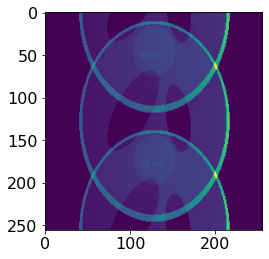

In [6]:
tmp = undersampled_datagroup["DATA"][0,...]
plt.imshow(np.abs(ifft2c(tmp, (0,1)))[...,0])

In [7]:
recongroup = grappa(undersampled_datagroup)

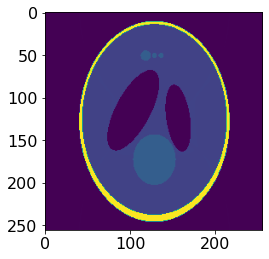

In [8]:
plt.imshow(np.abs(recongroup["DATA"].data[0,...]))